## QR-Factorization

In [1]:
import scipy
from scipy import matrix
from scipy import linalg
import numpy as np

In [2]:
# Classical Gram-Schmidt orthogonalization
# MATLAB
# function [Q, R] = clgs(A)
# [m, n] = size(A);
# V=A; Q=eye(m,n);
# R=zeros(n,n);
# for j=1:n
# for i=1:j-1
# R(i,j)=Q(:,i)’*A(:,j);
# V(:,j)=V(:,j)-R(i,j)*Q(:,i);
# end
# R(j,j)=norm(V(:,j));
# Q(:,j)=V(:,j)/R(j,j);
# end

In [3]:
# Modified Gram-Schmidt orthogonalization
# MATLAB
# function [Q, R] = grams(A)
# [m, n] = size(A);
# Q = A;
# R=zeros(n,n);
# for i = 1:n-1
# R(i,i)=norm(Q(:,i));
# Q(:,i)=Q(:,i)/R(i,i);
# R(i,i+1:n)=Q(:,i)’*Q(:,i+1:n);
# Q(:,i+1:n)=Q(:,i+1:n)-Q(:,i)*R(i,i+1:n);
# end
# R(n,n)=norm(Q(:,n));
# Q(:,n)=Q(:,n)/R(n,n);

In [4]:
A = matrix([[-1, -1, 1], [1, 3, 3], [-1, -1, 5], [1, 3, 7]])

In [5]:
A

matrix([[-1, -1,  1],
        [ 1,  3,  3],
        [-1, -1,  5],
        [ 1,  3,  7]])

In [6]:
Q, R = linalg.qr(A)

In [7]:
Q = np.asmatrix(Q)
Q

matrix([[-0.5, -0.5,  0.5,  0.5],
        [ 0.5, -0.5,  0.5, -0.5],
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.5, -0.5, -0.5,  0.5]])

In [8]:
R = np.asmatrix(R)
R

matrix([[ 2.,  4.,  2.],
        [ 0., -2., -8.],
        [ 0.,  0., -4.],
        [ 0.,  0.,  0.]])

In [9]:
Q*R

matrix([[-1., -1.,  1.],
        [ 1.,  3.,  3.],
        [-1., -1.,  5.],
        [ 1.,  3.,  7.]])

## Equation Solver

In [10]:
from sympy.solvers import solve
from sympy import Symbol

In [11]:
x = Symbol('x')
solve(x**2 - 1, x)

[-1, 1]

## Eigenvalues with Equation

In [12]:
A = matrix([[1, 2], [3, -4]])
A

matrix([[ 1,  2],
        [ 3, -4]])

In [13]:
lam = Symbol('lam')

In [14]:
A_lam = A - lam*np.asmatrix(np.identity(2))
A_lam

matrix([[-1.0*lam + 1, 2],
        [3, -1.0*lam - 4]], dtype=object)

In [15]:
equation = A_lam[0,0]*A_lam[1,1] - A_lam[0,1]*A_lam[1,0]
equation

(-1.0*lam - 4)*(-1.0*lam + 1) - 6

In [16]:
solve(equation, lam)

[-5.00000000000000, 2.00000000000000]

## Eigenvalues and Eigenvectors with Package

In [17]:
eigenvalue, eigenvector = linalg.eig(A)

In [18]:
eigenvalue

array([ 2.+0.j, -5.+0.j])

In [19]:
eigenvector

array([[ 0.89442719, -0.31622777],
       [ 0.4472136 ,  0.9486833 ]])

## Eigen Value Decomposition

In [20]:
eigenvalue, eigenvector = linalg.eig(A)

In [21]:
eigenvalue.shape[0]

2

In [22]:
L = np.identity(eigenvalue.shape[0])
for i in range(eigenvalue.shape[0]) :
    L[i, i] = eigenvalue[i]
L

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 2.,  0.],
       [ 0., -5.]])

In [23]:
S= np.asmatrix(eigenvector)
S

matrix([[ 0.89442719, -0.31622777],
        [ 0.4472136 ,  0.9486833 ]])

In [24]:
A*S

matrix([[ 1.78885438,  1.58113883],
        [ 0.89442719, -4.74341649]])

In [25]:
S*L

matrix([[ 1.78885438,  1.58113883],
        [ 0.89442719, -4.74341649]])

In [26]:
A*S==S*L

matrix([[ True, False],
        [False,  True]])

In [27]:
np.allclose(A*S, S*L)

True

## SVD

In [28]:
A = matrix([[3, 1, 1], [-1, 3, 1]])
A

matrix([[ 3,  1,  1],
        [-1,  3,  1]])

In [29]:
U, s, V = linalg.svd(A, full_matrices=True)

In [30]:
U = np.asmatrix(U)
U

matrix([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]])

In [31]:
s = np.asmatrix(s)
s

matrix([[3.46410162, 3.16227766]])

In [32]:
V = np.asmatrix(V)
V

matrix([[-4.08248290e-01, -8.16496581e-01, -4.08248290e-01],
        [-8.94427191e-01,  4.47213595e-01,  5.27355937e-16],
        [-1.82574186e-01, -3.65148372e-01,  9.12870929e-01]])

In [33]:
list(A.shape)

[2, 3]

In [34]:
np.min(list(A.shape))

2

In [35]:
S = np.zeros((A.shape))
for i in range(np.min(list(A.shape))) :
    S[i, i] = s[0,i]
S

array([[3.46410162, 0.        , 0.        ],
       [0.        , 3.16227766, 0.        ]])

In [36]:
U*S*V

matrix([[ 3.,  1.,  1.],
        [-1.,  3.,  1.]])

## Image Compression with SVD

https://github.com/rameshputalapattu/jupyterexplore/blob/master/jupyter_interactive_environment_exploration.ipynb

In [37]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

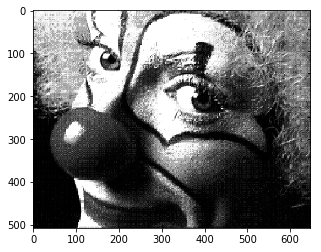

In [38]:
img = mpimg.imread('data/sample.png')
plt.imshow(img)

In [39]:
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float

gray_images = {
    "Pierrot":rgb2gray(img_as_float(img))
}

In [40]:
def compress_svd(image, k):
    U, s, V = linalg.svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    
    return reconst_matrix, s

In [41]:
reconst_matrix, s = compress_svd(rgb2gray(img_as_float(img)),50)

In [42]:
s[:5]

array([266.53154921,  68.28481384,  57.90747286,  39.15993506,
        36.53256079])

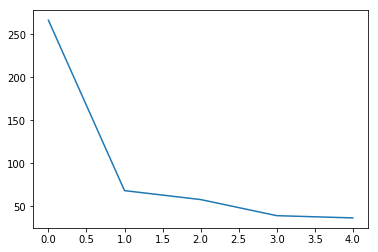

In [43]:
plt.plot(s[:5])

In [44]:
def compress_show_gray_images(img_name,k):
    
    image=gray_images[img_name]
    
    original_shape = image.shape
    reconst_img,s = compress_svd(image, k)
    
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    
    axes[0].plot(s)
    
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    
    fig.tight_layout()

In [45]:
from ipywidgets import interact,interactive,interact_manual
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,100));

interactive(children=(Dropdown(description='img_name', options=('Pierrot',), value='Pierrot'), IntSlider(value…